# clustering

## K Means clustering

### import what required

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("./Mall_Customers.csv")
print(df)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [4]:
df.drop(["Gender","Age", "CustomerID"], inplace = True, axis = 1)

In [5]:
df.rename(
    {
     "Annual Income (k$)" : "income" ,
     "Spending Score (1-100)" : "score"
    }, axis = 1, inplace = True
)

In [6]:
df.columns

Index(['income', 'score'], dtype='object')

In [7]:
from sklearn.cluster import KMeans

In [8]:
# collect wss for every k value
wss = []
# collect within cluster variations for k from 1 to 10
for k in range(1,11):
    # create a obj of kmeans
    kmeans_model = KMeans(n_clusters=k, random_state= 12345)
    # fit the data
    kmeans_model.fit(df)
    #collect the within cluster veriation 
    wss.append(kmeans_model.inertia_)

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [9]:
print(wss)

[269981.28, 181363.595959596, 106348.37306211118, 73679.78903948836, 44448.4554479337, 37233.81451071001, 30241.34361793659, 25056.895153616184, 21862.09267218289, 19775.97623125676]


Text(0, 0.5, 'x')

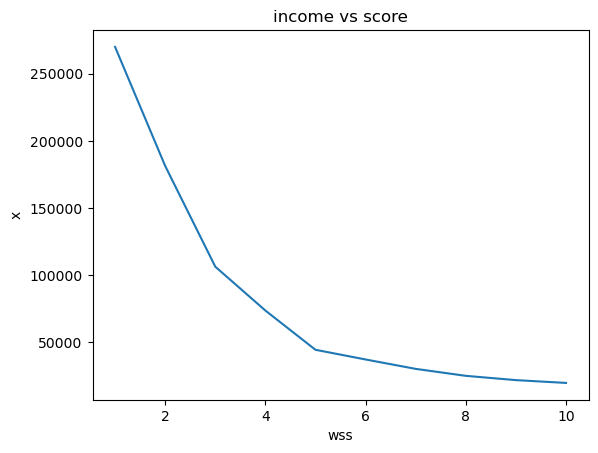

In [11]:
x = np.arange(1,11)

plt.plot(x,wss)
plt.title("income vs score")
plt.xlabel("wss")
plt.ylabel("x")